## Predicting Breast Cancer using Machine Learning

This notebook looks to predict whether or not whether a medical patient has breast cancer 
or not based off on various medical attributes using various machine learning models/estimators
and different data science libraries.

Approach/Methodology:

    1. Problem definition
    2. Data
    3. Evaluation
    4. Features
    5. Modelling
    6. Experimentation


### 1. Problem Definition

    Identification of breast cancer in a patient based on medical records.
        
 ### 2. Data
       
        Data used during the course of the project was obtained from: 
            https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
                        
### 3. Evaluation
        
        Reaching 90% accuracy would be deemed as success forn this project.
              
### 4. Features

 #### Data Dictionary
 
    1. radius_mean:	Mean radius of the tumor cells
    2. radius_mean:	Mean radius of the tumor cells
    3. texture_mean:	Mean texture of the tumor cells
    4. perimeter_mean:	Mean perimeter of the tumor cells
    5. area_mean: Mean area of the tumor cells
    6. smoothness_mean:	Mean smoothness of the tumor cells
    7. compactness_mean:	Mean compactness of the tumor cells
    8. concavity_mean:	Mean concavity of the tumor cells
    9. concave_points_mean:	Mean number of concave portions of the contour of the tumor cells
    10. symmetry_mean:	Mean symmetry of the tumor cells
    11. fractal_dimension_mean:	Mean "coastline approximation" of the tumor cells
    12. radius_se:	Standard error of the radius of the tumor cells
    13. texture_se:	Standard error of the texture of the tumor cells
    14. perimeter_se:	Standard error of the perimeter of the tumor cells
    15. area_se:	Standard error of the area of the tumor cells
    16. smoothness_se:	Standard error of the smoothness of the tumor cells
    17. compactness_se:	Standard error of the compactness of the tumor cells
    18. concavity_se:	Standard error of the concavity of the tumor cells
    19. concave_points_se:	Standard error of the number of concave portions of the contour of the tumor cells
    20. symmetry_se:	Standard error of the symmetry of the tumor cells
    21. fractal_dimension_se:	Standard error of the "coastline approximation" of the tumor cells
    22. radius_worst:	Worst (largest) radius of the tumor cells
    23. texture_worst:	Worst (most severe) texture of the tumor cells
    24. perimeter_worst:	Worst (largest) perimeter of the tumor cells
    25. area_worst:	Worst (largest) area of the tumor cells
    26. smoothness_worst:	Worst (most severe) smoothness of the tumor cells
    27. compactness_worst:	Worst (most severe) compactness of the tumor cells
    28. concavity_worst:	Worst (most severe) concavity of the tumor cells
    29. concave_points_worst:	Worst (most severe) number of concave portions of the contour of the tumor cells
    30. symmetry_worst:	Worst (most severe) symmetry of the tumor cells
    31. fractal_dimension_worst:	Worst (most severe) "coastline approximation" of the tumor cells
    32. target:	Diagnosis (1 = Malignant (Cancer), 0 = Benign (Not cancer))
 

### Importing the tools we need

In [33]:
# Data Manipulation and Exploratory Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Sklearn evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import classification_report

### Importing the Data 

In [2]:
# Loading the data into the notebook
np.random.seed(42)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Loading the data into a pandas dataframe
cancer_df = pd.DataFrame(cancer['data'], columns= cancer['feature_names'])
cancer_df['target'] = cancer['target']
cancer_temp = cancer_df.sample(frac=1)

# Splitting the dataframe into target and feature variables
X = cancer_temp.drop('target', axis=1)
y = cancer_temp['target']

### Exploratory Data Analysis

In [3]:
# Overview of the data
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# Basic info of the data
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
# Checking for duplicated records/values in the dataframe
cancer_df.duplicated().sum()

0

In [7]:
# Checking for null values 
cancer_df.isnull().sum() # No null values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

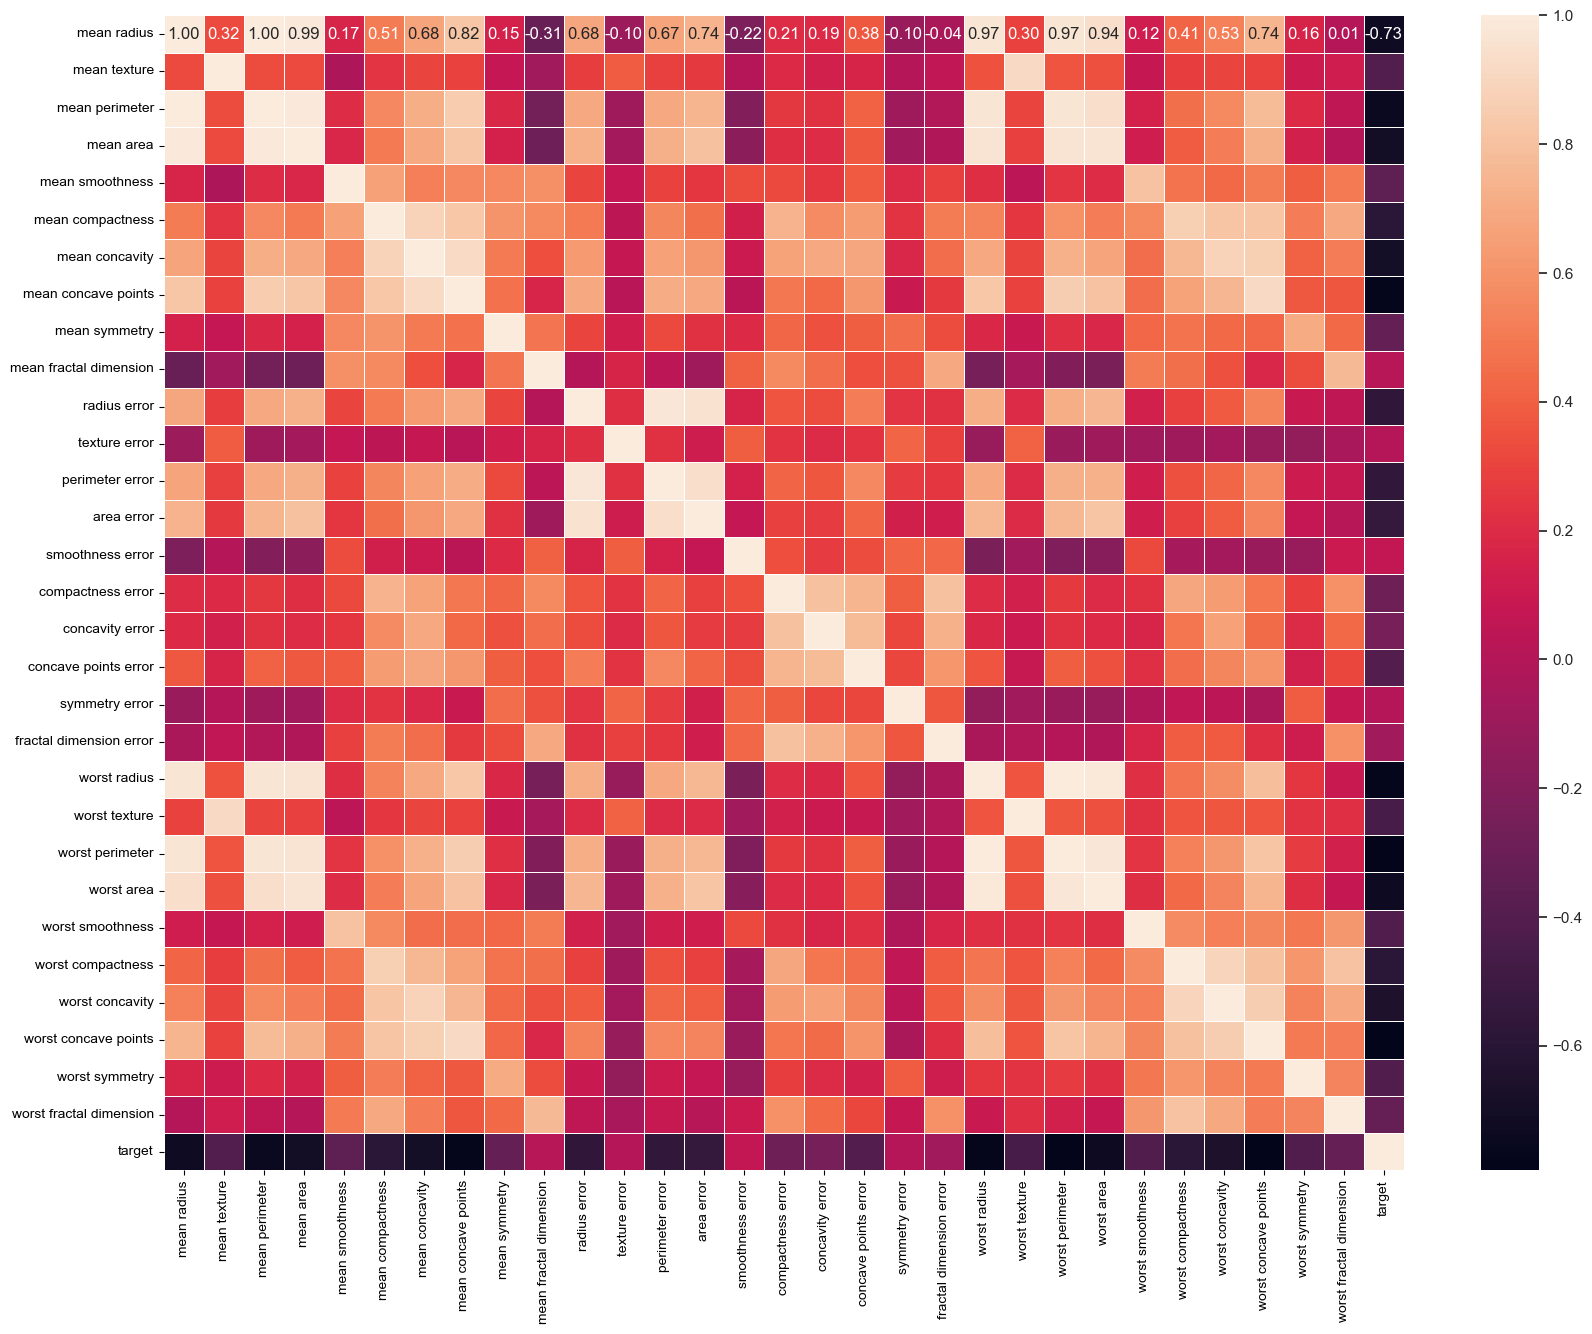

In [8]:
# Correlation between the feature labels and target variable
corr_matrix = cancer_df.corr()

fig, ax = plt.subplots(figsize=(20,15))
sns.set_theme()
sns.heatmap(corr_matrix,
            linewidths=0.5,
            annot=True,
            fmt=".2f",
            ax=ax);
                 

In [9]:
corr_matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


### Modelling

In [56]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [55]:
# Split the data inton train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Instantiating the models in the dictionary
models = {'LinearSVC': LinearSVC(),
          'RandomForest': RandomForestClassifier(),
          'SGDClassifier': SGDClassifier(),
           'SVC': SVC()}

def fit_score(models, X_train, X_test, y_train, y_test):
    ''' 
    Fits and evaluate given machine learning estimators/models.
    models: a dict of different Sklearn machine learning models.
    X_train : training data(no labels)
    X_test: testing data (no labels)
    y_train : training labels
    y_test : test labels
    '''
    
    for name, model in models.items():
        np.random.seed(42)
        model_scores = {}
        # Fit each model
        model.fit(X_train, y_train)
        # Score each model
        model_scores[name] = model.score(X_test, y_test)
        
        print(model_scores)
        
    return 

fit_score(models, X_train, X_test, y_train, y_test)

C:\Users\Jedidiah Kristilere\Desktop\ml-course\heart-disease-project\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Jedidiah Kristilere\Desktop\ml-course\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'LinearSVC': 0.868421052631579}
{'RandomForest': 0.9473684210526315}
{'SGDClassifier': 0.8771929824561403}
{'SVC': 0.8771929824561403}


### Hyperparameter Tuning using RandomizedSearchCV

#### 1. SVC

In [11]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [171]:
%%time
SVC_grid = {'C': np.arange(1, 1000, 10),
            'gamma': np.arange(0.00001, 1, 5),
            'kernel': ['linear', 'poly', 'rbf']}

rs_SVC = RandomizedSearchCV(SVC(),
                      SVC_dict,
                      refit=True,      
                      n_iter=5,
                      cv=5,
                      verbose=True)

rs_SVC.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 1min 54s
Wall time: 2min 36s


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=5,
                   param_distributions={'C': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991]),
                                        'gamma': array([1.e-05]),
                                        'kernel': ['linear', 'poly', 'rbf']},
                   verbose=True)

In [172]:
rs_SVC.best_params_

{'kernel': 'poly', 'gamma': 1e-05, 'C': 931}

In [173]:
rs_SVC.score(X_test, y_test)

0.9298245614035088

#### 2. SDGClassifier

In [17]:
SGDClassifier().get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [170]:
%%time 

sgd_grid = {'max_iter': np.arange(1000, 5000, 8),
            "alpha":(0.00001, 0.00001),
            "penalty": ("l2", "elasticnet")}
    
rs_sgd = RandomizedSearchCV(SGDClassifier(),
                            param_sgd,
                            refit=True,
                            n_iter=100,
                            cv=5,
                            verbose=True,
                            random_state=42)
                    
    
rs_sgd.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 2.81 s
Wall time: 5.53 s


RandomizedSearchCV(cv=5, estimator=SGDClassifier(), n_iter=100,
                   param_distributions={'alpha': (1e-05, 1e-05),
                                        'max_iter': array([1000, 1008, 1016, 1024, 1032, 1040, 1048, 1056, 1064, 1072, 1080,
       1088, 1096, 1104, 1112, 1120, 1128, 1136, 1144, 1152, 1160, 1168,
       1176, 1184, 1192, 1200, 1208, 1216, 1224, 1232, 1240, 1248, 1256,
       1264, 1272, 1280, 1288, 1296, 1304, 1312, 1320, 1328, 1336, 1344,
       1352, 136...
       4520, 4528, 4536, 4544, 4552, 4560, 4568, 4576, 4584, 4592, 4600,
       4608, 4616, 4624, 4632, 4640, 4648, 4656, 4664, 4672, 4680, 4688,
       4696, 4704, 4712, 4720, 4728, 4736, 4744, 4752, 4760, 4768, 4776,
       4784, 4792, 4800, 4808, 4816, 4824, 4832, 4840, 4848, 4856, 4864,
       4872, 4880, 4888, 4896, 4904, 4912, 4920, 4928, 4936, 4944, 4952,
       4960, 4968, 4976, 4984, 4992]),
                                        'penalty': ('l2', 'elasticnet')},
                   random_state=42, verbose=True)

In [150]:
rs_sgd.best_params_

{'penalty': 'elasticnet', 'max_iter': 1440, 'alpha': 1e-05}

In [152]:
rs_sgd.score(X_test, y_test)

0.8596491228070176

#### 3. RandomForestClassifier

In [165]:
%%time

rf_grid = {"n_estimators": np.arange(10, 1000, 5),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20,5),
           "min_samples_leaf": np.arange(1, 20, 5)}

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           rf_grid,
                           refit=True,
                           n_iter=5,
                           cv=5,
                           verbose=True)



rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 1min 28s
Wall time: 1min 58s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  6, 11, 16]),
                                        'min_samples_split': array([ 2,  7, 12, 17]),
                                        'n_estimators': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 20...
       530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590,
       595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655,
       660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720,
       725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785,
       790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850,
       855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915,
       920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980,
       985, 990, 995])},
                   verbose=True)

In [169]:
rs_rf.best_params_

{'n_estimators': 885,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [168]:
rs_rf.score(X_test, y_test)

0.9298245614035088

### Using GridSearchCV for Hyperparameter Tuning for RandomForest and SVC models

#### 1. SVC()



In [175]:
%%time
SVC_grid = {'C': np.arange(1, 1000, 10),
            'gamma': np.arange(0.00001, 1, 5),
            'kernel': ['linear', 'poly', 'rbf']}

gs_svc = GridSearchCV(SVC(),
                      SVC_grid,
                      refit=True,
                      cv=5,
                      verbose=True)

gs_svc.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991]),
                         'gamma': array([1.e-05]),
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=True)

In [178]:
gs_svc.best_params_

{'C': 61, 'gamma': 1e-05, 'kernel': 'poly'}

In [179]:
gs_svc.score(X_test, y_test)

0.9385964912280702

#### 2. RandomForestClassifier

In [14]:
%%time
rf_grid = {"n_estimators": [100, 500, 800, 1000],
           "max_depth": [3],
           "min_samples_split": np.arange(2, 5,3),
           "min_samples_leaf": np.arange(1, 4, 2)}

gs_rf = GridSearchCV(RandomForestClassifier(),
                     rf_grid,
                     refit=True,
                     cv=5,
                     verbose=True)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 1min 43s
Wall time: 2min 15s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3], 'min_samples_leaf': array([1, 3]),
                         'min_samples_split': array([2]),
                         'n_estimators': [100, 500, 800, 1000]},
             verbose=True)

In [15]:
gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [16]:
gs_rf.score(X_test, y_test)

0.9210526315789473

In [13]:
model_1 = RandomForestClassifier(n_estimators=800, 
                               min_samples_leaf=1,
                               min_samples_split=2,
                               max_depth=3,)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9298245614035088

In [17]:
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)
model_2.score(X_test, y_test)

0.9385964912280702

The model with the best accuracy score is RandomForestClassifier with a 

### Evaluation Metrics

We'll be evaluating the RandomForestCLassifier model on a list of other metrics such as accuracy, precision, recall, f-1 and classification report using `CrossValidation`

In [18]:
y_preds = model_2.predict(X_test)

In [36]:
# Create function to evaluate RF Model based on various metrics

def score_eval(y_true, y_preds):
    acc_score = accuracy_score(y_true, y_preds)
    pre_score = precision_score(y_true, y_preds)
    rec_score = recall_score(y_true, y_preds)
    f1_sc = f1_score(y_true, y_preds)
    scores = {"Accuracy": round((acc_score*100),2),
               "Precision": round((pre_score*100),2),
               "Recall": round((rec_score*100),2),
               "F1": round((f1_sc*100),2)}
    return scores

In [37]:
score_eval(y_test, y_preds)

{'Accuracy': 93.86, 'Precision': 92.96, 'Recall': 97.06, 'F1': 94.96}

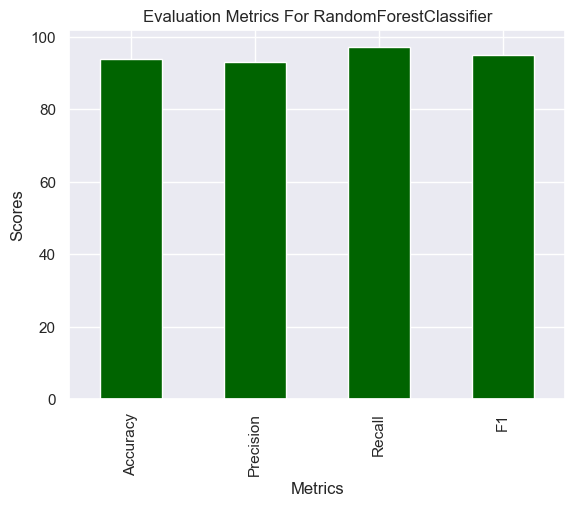

In [57]:
cv_metrics = pd.Series(data=score_eval(y_test, y_preds))

cv_metrics.plot.bar(title="Evaluation Metrics For RandomForestClassifier", color='darkgreen',
                    xlabel = 'Metrics',
                    ylabel = 'Scores');

### Feature Importance

Identifying the features that contributed the most to the outcome of the model and ranking their level of importance.

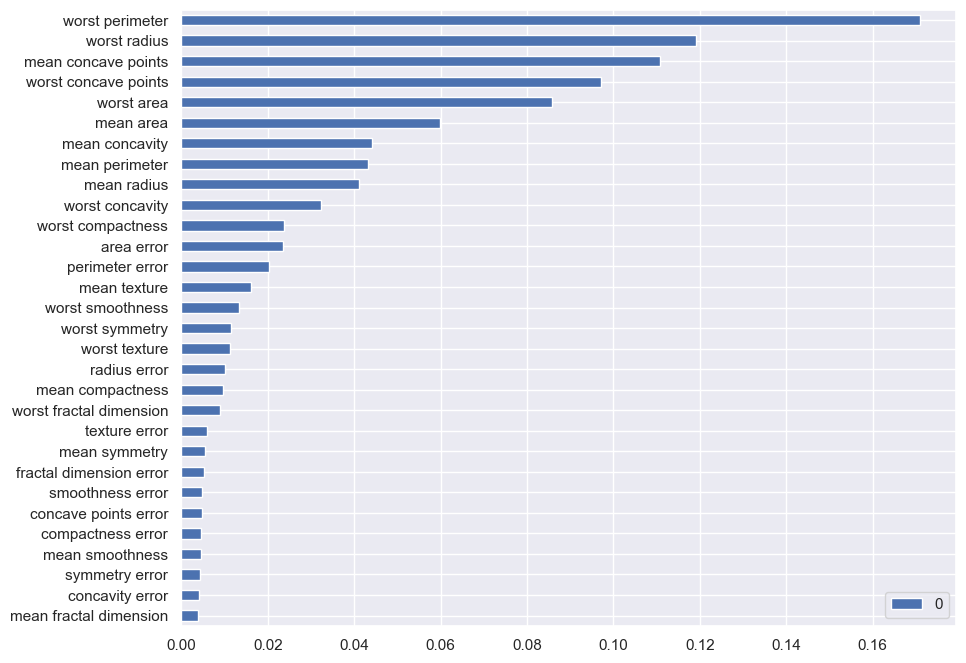

In [97]:
feat_imp = model_2.feature_importances_

feat_vis = pd.DataFrame(feat_imp, index=X.columns).sort_values(by=0, ascending=True)

feat_vis.plot.barh(figsize=(10,8));